In [ ]:
!pip install nengo
!pip install matplotlib
!pip install nengo_loihi

In [ ]:
import nengo
from nengo.processes import Piecewise
from  nengo.utils.matplotlib  import  rasterplot
import numpy as np
from numpy import random
import nengo_loihi
import matplotlib.pyplot as plt
import nengo.utils.least_squares_solvers as lstsq
import pylab
SEED= 1
D = 1
N = 3

model = nengo.Network(label="My Network")
with model:
    cs_stimuli = Piecewise({
            0: 0,
            0.1: 0,
            0.1: 0.2,
            1.1: 0.2,
            1.1: 0,
            1.2: 0,
            1.3: 0,
            1.4: 0,
            1.5: 0,
            1.5: 0.2,
            2.5: 0.2,
            2.5: 0,
            2.6: 0,
            2.7: 0,
            2.8: 0,
            2.9: 0,
            2.9: 0.2,
            3.9: 0.2,
            3.9: 0,
            4.0: 0,
            4.1: 0,
            4.2: 0,
            4.3: 0,
            4.3: 0.2,
            5.3: 0.2,
            5.3: 0,
            5.4: 0,
            5.5: 0,
            5.6: 0,
            5.7: 0,
            5.7: 0.2,
            6.7: 0.2,
            6.7: 0,
            6.8: 0,
            6.9: 0,
            7.0: 0
        })
    us_stimuli = Piecewise({
            0: 0,
            0.1: 0,
            0.2: 0,
            0.3: 0,
            0.4: 0,
            0.5: 0,
            0.6: 0,
            0.7: 0,
            0.7: 0.2,
            1.1: 0.2,
            1.1: 0,
            1.2: 0,
            1.3: 0,
            1.4: 0,
            1.5: 0,
            1.6: 0,
            1.7: 0,
            1.8: 0,
            1.9: 0,
            2.0: 0,
            2.1: 0,
            2.1: 0.2,
            2.5: 0.2,
            2.5: 0,
            2.6: 0,
            2.7: 0,
            2.8: 0,
            2.9: 0,
            3.0: 0,
            3.1: 0,
            3.2: 0,
            3.3: 0,
            3.4: 0,
            3.5: 0,
            3.5: 0.2,
            3.9: 0.2,
            3.9: 0,
            4.0: 0,
            4.1: 0,
            4.2: 0,
            4.3: 0,
            4.4: 0,
            4.5: 0,
            4.6: 0,
            4.7: 0,
            4.8: 0,
            4.9: 0,
            4.9: 0.2,
            5.3: 0.2,
            5.3: 0,
            5.4: 0,
            5.5: 0,
            5.6: 0,
            5.7: 0,
            5.8: 0,
            5.9: 0,
            6.0: 0,
            6.1: 0,
            6.2: 0,
            6.3: 0,
            6.3: 0.2,
            6.7: 0.2,
            6.7: 0,
            6.8: 0,
            6.9: 0,
            7.0: 0

        })
           

    cs_stim = nengo.Node(cs_stimuli)
    us_stim = nengo.Node(us_stimuli)


    us = nengo.Ensemble(N, D, neuron_type=nengo.LIF(), intercepts=np.random.uniform(0.1,0.15,N), seed=SEED)
    cs = nengo.Ensemble(N, D, neuron_type=nengo.LIF(), intercepts=np.random.uniform(0.1,0.15,N),seed=SEED)
 
    weight1 = 1
    weight2 = 0.001
        
    nengo.Connection(us_stim, us)
    nengo.Connection(cs_stim, cs)

    cr = nengo.Ensemble(N, D, neuron_type=nengo.LIF(), intercepts=np.random.uniform(0,0.1,N), seed=SEED)
    learn_conn = nengo.Connection(cs, cr, transform= weight2, solver=nengo.solvers.LstsqL2(weights=True) )
    learn_conn.learning_rule_type = nengo.BCM(learning_rate=1e-9)
    with model:
        weights_p = nengo.Probe(learn_conn, 'weights', synapse=0.02)
      
    learn_conn2 = nengo.Connection(us, cr, transform=weight1, solver=nengo.solvers.LstsqL2(weights=True))
    learn_conn2.learning_rule_type = nengo.BCM(learning_rate=1e-5)
    with model:
        weights_p2 = nengo.Probe(learn_conn2, 'weights', synapse=0.02)
    

    cr_probe = nengo.Probe(cr.neurons)
    cs_probe = nengo.Probe(cs_stim)
    cr_voltage = nengo.Probe(cr.neurons, 'voltage')
    cs_voltage = nengo.Probe(cs.neurons, 'voltage')
    us_voltage = nengo.Probe(us.neurons, 'voltage')
    us_probe = nengo.Probe(us_stim)
    cr_spikes = nengo.Probe(cr.neurons)
    us_spikes = nengo.Probe(us.neurons)
    cs_spikes = nengo.Probe(cs.neurons)
    
 
    
 
    


In [ ]:
with nengo.Simulator(model) as sim:
    sim.run(20)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

Text(0, 0.5, 'CR spikes')

<Figure size 432x288 with 0 Axes>

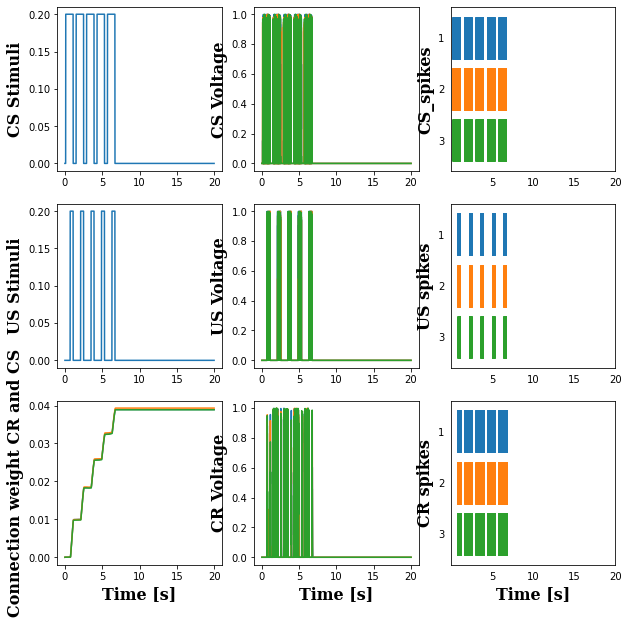

In [ ]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }
plt.subplots_adjust(left=0.2, right=0.9, bottom= 0.5, wspace=4, hspace=2)
plt.figure(figsize=(10, 32))
plt.subplot(9, 3, 1)
plt.plot(sim.trange(), sim.data[cs_probe])
#plt.xlabel ( 'time [s]' )
plt.ylabel("CS Stimuli", fontdict=font)
plt.subplot(9, 3, 2)
pylab.plot(sim.trange(), sim.data[cs_voltage], label='CS voltage')
plt.ylabel("CS Voltage", fontdict=font)
#plt.xlabel ( 'time [s]' )
plt.subplot(9, 3, 3)
rasterplot(sim.trange(), sim.data[cs_spikes])
plt.ylabel("CS_spikes", fontdict=font)
#plt.xlabel ( 'time [s]')
plt.subplot(9, 3, 4)
plt.plot(sim.trange(), sim.data[us_probe])
#plt.xlabel ( 'time [s]' )
plt.ylabel("US Stimuli", fontdict=font)
plt.subplot(9, 3, 5)
pylab.plot(sim.trange(), sim.data[us_voltage], label='US voltage')
plt.ylabel("US Voltage", fontdict=font)
#plt.xlabel ( 'time [s]' )
plt.subplot(9, 3, 6)
rasterplot (sim.trange (), sim.data [us_spikes])
#plt.xlabel ( 'time [s]' )
plt.ylabel("US spikes", fontdict=font)
plt.subplot(9, 3, 7)
neuron = np.argmax(np.mean(np.var(sim.data[weights_p], axis=0), axis=1))
plt.plot(sim.trange(), sim.data[weights_p][..., neuron])
plt.ylabel("Connection weight CR and CS", fontdict=font)
plt.xlabel ( 'Time [s]', fontdict=font )
plt.subplot(9, 3, 8)
pylab.plot(sim.trange(), sim.data[cr_voltage], label='CR voltage')
plt.ylabel("CR Voltage", fontdict=font)
plt.xlabel ( 'Time [s]', fontdict=font)
plt.subplot(9, 3, 9)
rasterplot(sim.trange(), sim.data [cr_probe])
plt.xlabel ( 'Time [s]', fontdict=font )
plt.ylabel("CR spikes", fontdict=font)